In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
#Load data using pandas. Make sure that the file is within the directory or use the full path to the file. ex. ('\C:\Users\mikep\etc')
data = pd.read_csv('MaleFemalePheno.csv')

In [3]:
#Get Categorical Array and seperate by category
Sex = data['Sex']
data_s = data.drop(['Sex'], axis = 1)

Male_Data = data[Sex==0]
Female_Data = data[Sex==1]

In [4]:
#Variable we want to control by
var_name = 'SMTSISCH'


Calculate how percise we want a contorl to be. The more bins the more percise.
The maximum nubmer of bins that can be used is limited by the covering of the larger distribution. 
![Example](Example.png)

Unless we want to also reduce the size of the orange distribution, we should choose a different bin size.



In [5]:
'''
Find the binning of the entire dataset. 
Once you have the desired numbers of bin, take the bin size and use that for the rest of the code.
In this case it is 241
'''
np.histogram_bin_edges(data['SMTSISCH'], bins=7)
binwidth = 241
bin = 7

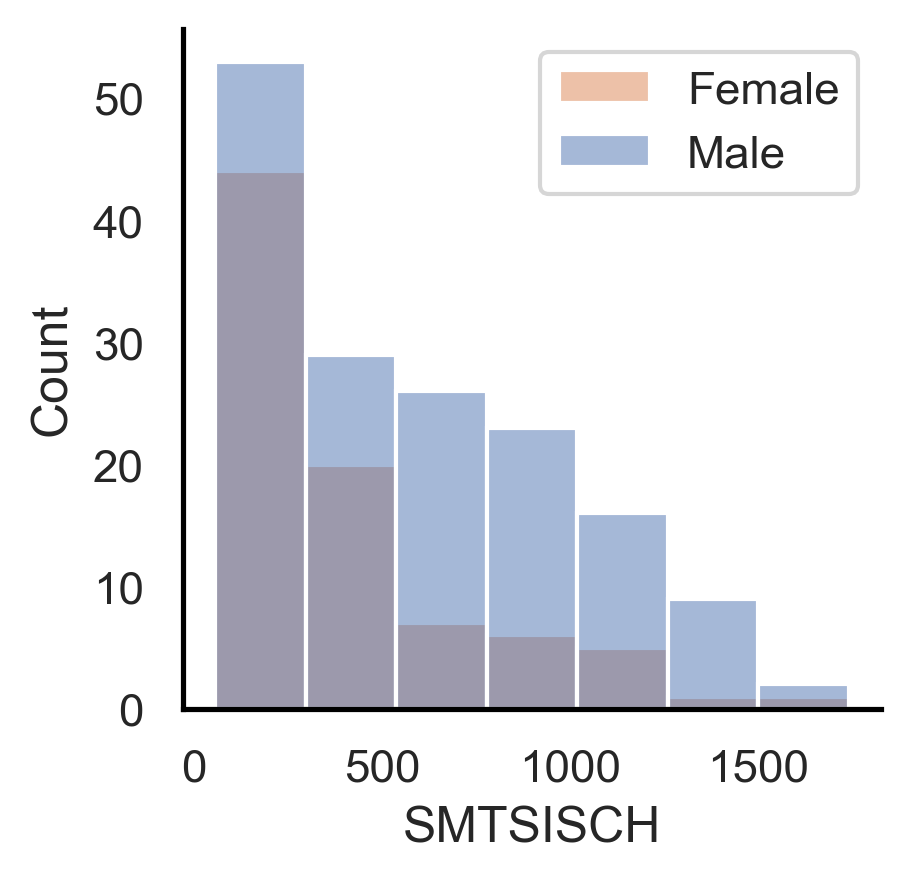

In [19]:
'''
We display the distributions to make sure it follows our binning rule.
'''
sns.set(rc={ 'figure.figsize':(3,3),'axes.facecolor':'white','axes.edgecolor':'black', 'axes.spines.right':False, 'axes.spines.top':False, 'figure.dpi':300})
ax = sns.histplot(data = data, x = var_name, hue = 'Sex', bins = bin, binwidth=binwidth)
ax.legend(['Female', 'Male'])

In [9]:
'''
Get the count for the number of samples in each bin.
'''
def get_counts(a, var_name, binwidth = 1, total_bins = None, start = None):
    #If we use the histogram bin edges funciton it does not allow us to choose the starting value.
    #this allows us to use our custom binning.
    #Specify start if the distribution you are binning does not have the smallest value of the two
    
    if start != None:
        mn = start
    else:
        mn = a[var_name].min()
        
    mx = a[var_name].max()
    
    #In some scenarios one distribution will have less bins based on the bin width.
    # specifying total_bins ensure equal number of bins is output.
    if total_bins == None:
        n = int(np.ceil((mx-mn)/binwidth))
    else:
        n = total_bins
    
    #Create arrays to store the number of values in each bin.
    count = []
    bins = []
    for i in range(n):
        count.append(len(a[var_name][(a[var_name] >= mn + binwidth*i) & (a[var_name] < mn + binwidth*i + binwidth)]))
        bins.append(mn + binwidth*i)
    bins.append(mn+binwidth*int(np.ceil((mx-mn)/binwidth)))
    return np.asarray(count), bins

In [10]:
#get male and female counts
male_count, _ = get_counts(Male_Data, var_name, binwidth = binwidth, start = 55)
female_count, bins = get_counts(Female_Data, var_name, total_bins = len(male_count),  binwidth = binwidth)
print(male_count)

[53 29 26 23 16  9  2]


In [11]:
diff_count = []
for i in range(len(female_count)):
    diff_count.append(np.abs(male_count[i] - female_count[i]))

In [12]:
diff_count

[9, 9, 19, 17, 11, 8, 1]

In [13]:
#Creates of bool array for values that are within a range
def get_bool_within_range(a, mn, mx):
    return (a >= mn) & (a < mx)
    
# Chooses random samples to drop from array
def generate_random(mx, n):
    take = np.arange(0,mx,1)
    r_samples = []
    for i in range(n):
        r = np.random.randint(0, len(take))
        r_samples.append(take[r])
        take = np.delete(take, r)
        
    return r_samples
            
#Create new array with dropped values. It should be equivalent in size to the array you are matching.
df = pd.DataFrame(columns = Male_Data.columns)
for i in range(len(diff_count)):
    temp = Male_Data[get_bool_within_range(Male_Data[var_name],bins[i], bins[i+1])].reset_index()
    temp = temp.drop(generate_random(male_count[i], diff_count[i]), axis = 'index')
    df = df.append(temp)

In [14]:
df = df.reset_index()

In [ ]:
data_2 = Female_Data.append(df)

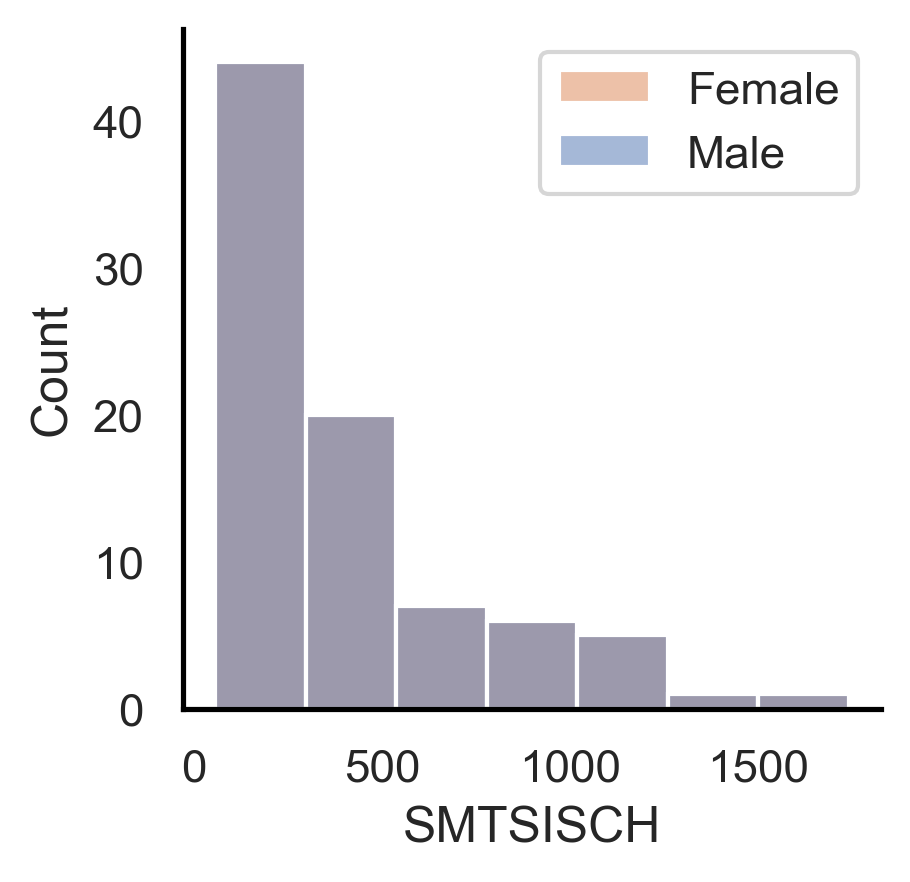

In [20]:
#display both distributions to make sure they fit
sns.set(rc={ 'figure.figsize':(3,3),'axes.facecolor':'white','axes.edgecolor':'black', 'axes.spines.right':False, 'axes.spines.top':False, 'figure.dpi':300})
ax = sns.histplot(data = data_2, x = var_name, hue = 'Sex', bins = bin, binwidth = binwidth)
ax.legend(['Female', 'Male'])


In [34]:
#save distributions in new csv file
data_2.to_csv('MaleFemaleRed.csv')